In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city = "city_data.csv"
ride = "ride_data.csv"


# Read the City and Ride Data
ride_df=pd.read_csv(ride)
city_df=pd.read_csv(city)


# Combine the data into a single dataset
df3 = pd.merge(city_df, ride_df)

# Display the data table for preview
df3.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

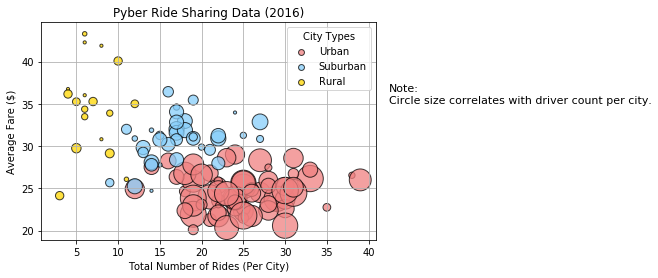

In [2]:
df3.type.unique()
# Obtain the x and y coordinates for each of the three city types
#y = Average Fare($) 
#x=Total Number of Rides (Per City)

average_fare=df3.groupby("city").fare.mean()
average_fare

total_rides = df3.groupby("city")["fare"].count()
total_rides

#plt.scatter(total_rides,average_fare, marker="o",facecolors="pink",edgecolors="black",
           #s=total_rides,alpha=0.75)

plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")

#Urban
urban_fare=df3.loc[df3["type"]=="Urban"].groupby("city").fare.mean()
urban_rides=df3.loc[df3["type"]=="Urban"].groupby("city").fare.count()
urban_drivercount=df3.loc[df3["type"]=="Urban"].groupby("city").driver_count.max()


plt.scatter(urban_rides,urban_fare, marker="o",facecolors="lightcoral",edgecolors="black",
           s=urban_drivercount*10,alpha=0.75,label='Urban')

#Suburban,lightskyblue
suburban_fare=df3.loc[df3["type"]=="Suburban"].groupby("city").fare.mean()
suburban_rides=df3.loc[df3["type"]=="Suburban"].groupby("city").fare.count()
suburban_drivercount=df3.loc[df3["type"]=="Suburban"].groupby("city").driver_count.max()

plt.scatter(suburban_rides,suburban_fare, marker="o",facecolors="lightskyblue",edgecolors="black",
           s=suburban_drivercount*10,alpha=0.75,label='Suburban')

#Rural,gold
rural_fare=df3.loc[df3["type"]=="Rural"].groupby("city").fare.mean()
rural_rides=df3.loc[df3["type"]=="Rural"].groupby("city").fare.count()
rural_drivercount=df3.loc[df3["type"]=="Rural"].groupby("city").driver_count.max()

plt.scatter(rural_rides,rural_fare, marker="o",facecolors="gold",edgecolors="black",
           s=rural_drivercount*10,alpha=0.75,label='Rural')



# Build the scatter plots for each city types

# Incorporate the other graph properties

# Create a legend
legend = plt.legend(loc=1,title='City Types')
for handle in legend.legendHandles:
    handle.set_sizes([35.0])

# Incorporate a text label regarding circle size
textstr="Note:\nCircle size correlates with driver count per city."
plt.text(0.93, 0.6, textstr, fontsize=11, transform=plt.gcf().transFigure)

#plt.note('Note: ' +\n+ 'Circle size correlates with driver count per city.')
#Circle size correlates with driver count per city.

plt.grid()

# Save Figure
plt.savefig("./ride_sharing_data.png", bbox_inches = "tight")

plt.show()

In [3]:
# Show plot
plt.show()

## Total Fares by City Type

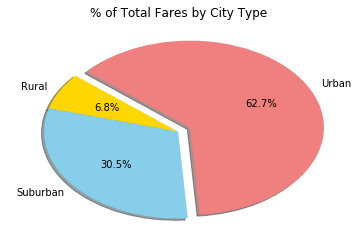

In [4]:
# Calculate Type Percents

city_type = df3.groupby("type").fare.sum()

# Build Pie Chart
explode = (0, 0, 0.1)
labels=("Rural","Suburban","Urban")
colors=('gold','skyblue','lightcoral')
plt.pie(city_type,explode=explode, labels=labels, colors = colors,autopct="%1.1f%%",
        shadow = True,startangle=140)

plt.title("% of Total Fares by City Type")


# Save Figure

plt.savefig("./Total_Fare_City_Type.png")

In [5]:
# Show Figure
plt.show()

## Total Rides by City Type

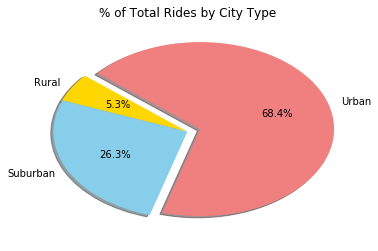

In [6]:
# Calculate Ride Percents

total_rides_by_city = df3.groupby("type").city.count()
total_rides_by_city

# Build Pie Chart
explode = (0, 0, 0.1)
labels=("Rural","Suburban","Urban")
colors=('gold','skyblue','lightcoral')
plt.pie(total_rides_by_city,explode=explode, labels=labels, colors = colors,autopct="%1.1f%%",
        shadow = True,startangle=140)
plt.title("% of Total Rides by City Type")
plt.show

# Save Figure
plt.savefig("./Total_Rides_City_Type.png")

In [7]:
# Show Figure
plt.show()

## Total Drivers by City Type

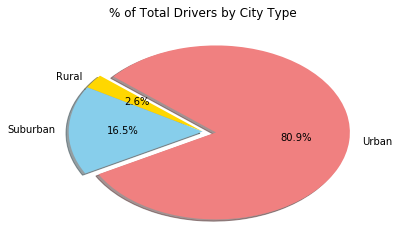

In [12]:
# Calculate Driver Percents

driver_percents = city_df.groupby("type").driver_count.sum()
# driver_percents = df3.groupby("type").driver_count.max()

# Build Pie Charts
explode = (0, 0, 0.1)
labels=("Rural","Suburban","Urban")
colors=('gold','skyblue','lightcoral')
plt.pie(driver_percents,explode=explode, labels=labels, colors = colors,autopct="%1.1f%%",
        shadow = True,startangle=140)
plt.title("% of Total Drivers by City Type")
plt.show


# Save Figure
plt.savefig("./Drive_City_Type.png")

In [9]:
# Show Figure
plt.show()